In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot


init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [35]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [36]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [37]:
df['zip'].value_counts().head(5)  # top 5 zipcodes

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [38]:
df['twp'].value_counts().head() # top 5 townships

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [39]:
df['title'].unique() # unique title entries

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [40]:
df['title'].nunique()

110

In [41]:
df['title'].apply(lambda x:x.split(':')[0]).value_counts() # type of emergency / 911 department

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

In [42]:
# Reformat df['title'] column of format "Department/callReason" into 2 independent columns df[['Department', 'callReason']]
# Drop df['title'] columns

df['Department'] = df['title'].apply(lambda x: x.split(':')[0])
df['callReason'] = df['title'].apply(lambda x: x.split(':')[1])

df.drop('title', inplace=True, axis=1) # axis refers to row -> 0 or column -> 1

df.head(3)

,lat,lng,desc,zip,timeStamp,twp,addr,e,Department,callReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK


In [43]:
df.rename(columns={'Department':'department'}, inplace=True)
df[['department', 'callReason']]

,department,callReason
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
4,EMS,DIZZINESS
...,...,...
99487,Traffic,VEHICLE ACCIDENT -
99488,Traffic,VEHICLE ACCIDENT -
99489,EMS,FALL VICTIM
99490,EMS,NAUSEA/VOMITING


<AxesSubplot:xlabel='department', ylabel='count'>

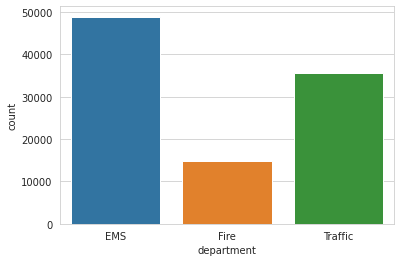

In [44]:
sns.countplot(x='department',data=df)

In [45]:
df.dtypes

# object = mixed data types

lat           float64
lng           float64
desc           object
zip           float64
timeStamp      object
twp            object
addr           object
e               int64
department     object
callReason     object
dtype: object

In [46]:
type(df['timeStamp'].iloc[0])

str

In [47]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lat         99492 non-null  float64       
 1   lng         99492 non-null  float64       
 2   desc        99492 non-null  object        
 3   zip         86637 non-null  float64       
 4   timeStamp   99492 non-null  datetime64[ns]
 5   twp         99449 non-null  object        
 6   addr        98973 non-null  object        
 7   e           99492 non-null  int64         
 8   department  99492 non-null  object        
 9   callReason  99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [48]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [49]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

day = time.dayofweek
day = day_map[day]
print(day)
print(time.month_name())
print(time.hour)

Thu
December
17


In [50]:
df['dayOfWeek'] = df['timeStamp'].apply(lambda date: day_map[date.dayofweek])
df['month'] = df['timeStamp'].apply(lambda date: date.month_name())
df['hour'] = df['timeStamp'].apply(lambda date: date.hour)

df.head(2)

,lat,lng,desc,zip,timeStamp,twp,addr,e,department,callReason,dayOfWeek,month,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,Thu,December,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,Thu,December,17


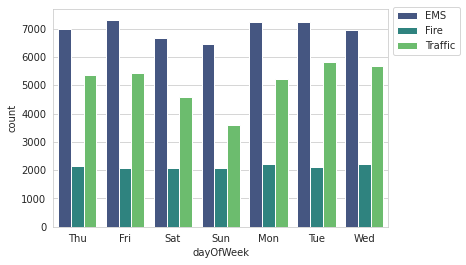

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='dayOfWeek', data=df, hue='department', palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))

<AxesSubplot:xlabel='month', ylabel='count'>

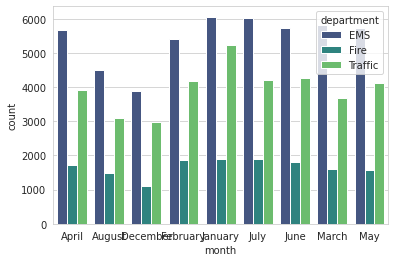

In [52]:
sns.countplot(x=df['month'].sort_values(), data=df, hue='department', palette='viridis')

In [53]:
df['month'] = df['timeStamp'].apply(lambda date: date.month) 
# reformat month col from month_names to month index (1-12)
# create dict to map index to name
# sort dict keys to show ascending order on plot
# sorting month_name str values gives undesireable plot (above)

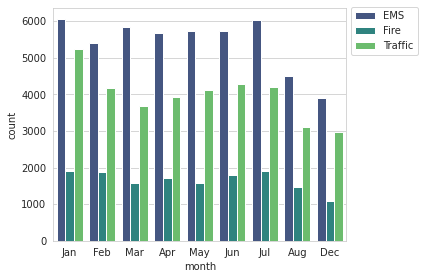

In [54]:
mmap = {1:'Jan', 2:'Feb', 3:'Mar',
4:'Apr', 5:'May', 6:'Jun',
7:'Jul', 8:'Aug', 9:'Sept',
10:'Oct', 11:'Nov', 12:'Dec'}

sns.countplot(x=df['month'].sort_values().apply(lambda month:mmap[month]), data=df, hue='department', palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.tight_layout()



In [55]:
# Months missing -> different plot to account for missing data? Line plot?

In [56]:
byMonth = df.groupby('month').count()
byMonth.head(10)

,lat,lng,desc,zip,timeStamp,twp,addr,e,department,callReason,dayOfWeek,hour
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='month', ylabel='department'>

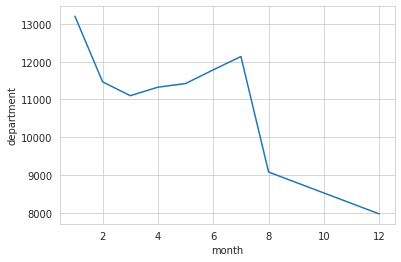

In [57]:
sns.lineplot(x='month', y='department', data=byMonth)

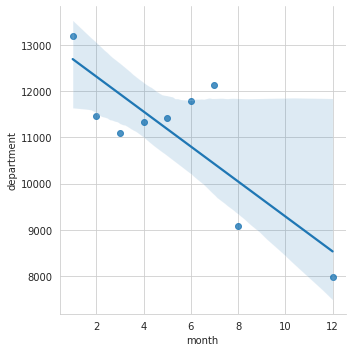

In [58]:
byMonth.reset_index(inplace=True)
sns.lmplot(x='month', y='department', data=byMonth)

In [59]:
df['date'] = df['timeStamp'].apply(lambda date: date.date())
df.head(3)

,lat,lng,desc,zip,timeStamp,twp,addr,e,department,callReason,dayOfWeek,month,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,Thu,12,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,Thu,12,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,Thu,12,17,2015-12-10


In [60]:
byDate = df.groupby('date').count()
byDate.head(3)

,lat,lng,desc,zip,timeStamp,twp,addr,e,department,callReason,dayOfWeek,month,hour
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,401,403,403,403,403,403,403


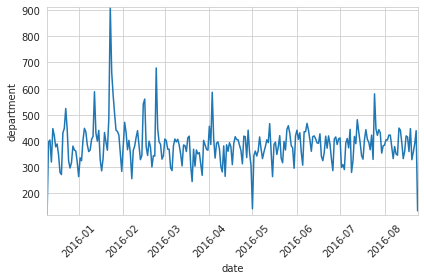

In [61]:
#loc, labels = plt.xticks()
sns.lineplot(x='date', y='department', data=byDate)
plt.margins(0)
plt.xticks(rotation=45)
plt.tight_layout()

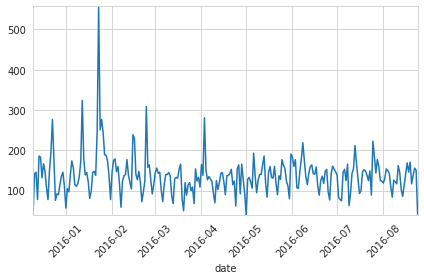

In [62]:
df[df['department']=='Traffic'].groupby('date').count()['callReason'].plot()
plt.margins(0)
plt.xticks(rotation=45)
plt.tight_layout()

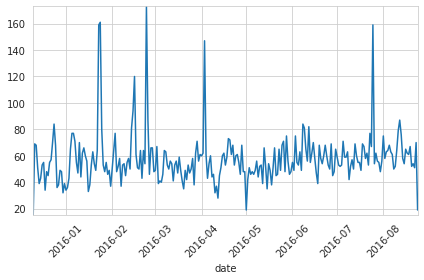

In [63]:
df[df['department']=='Fire'].groupby('date').count()['callReason'].plot()
plt.margins(0)
plt.xticks(rotation=45)
plt.tight_layout()

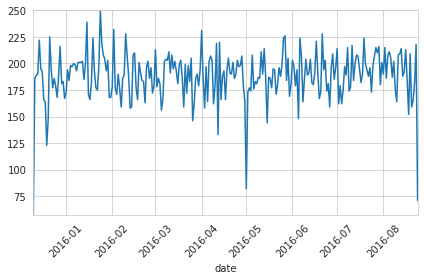

In [64]:
df[df['department']=='EMS'].groupby('date').count()['callReason'].plot()
plt.margins(0)
plt.xticks(rotation=45)
plt.tight_layout()

In [65]:
df.head(2)

,lat,lng,desc,zip,timeStamp,twp,addr,e,department,callReason,dayOfWeek,month,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,Thu,12,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,Thu,12,17,2015-12-10


In [66]:
new_df = df.groupby(['dayOfWeek', 'hour']).count()['callReason'].unstack(level=-1)
new_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


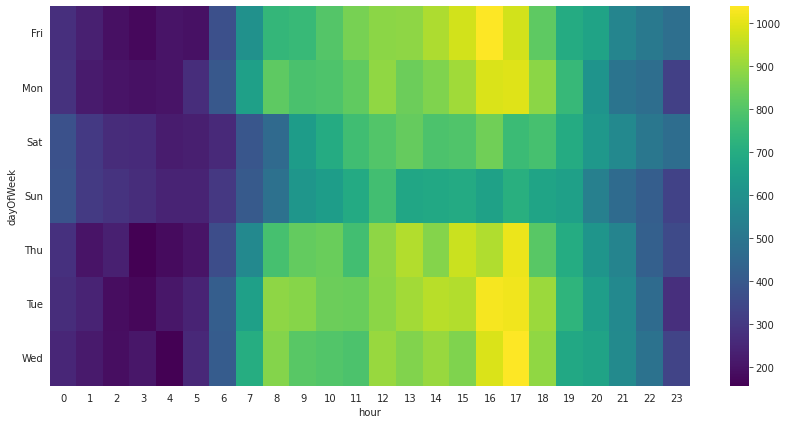

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(new_df, cmap='viridis')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()

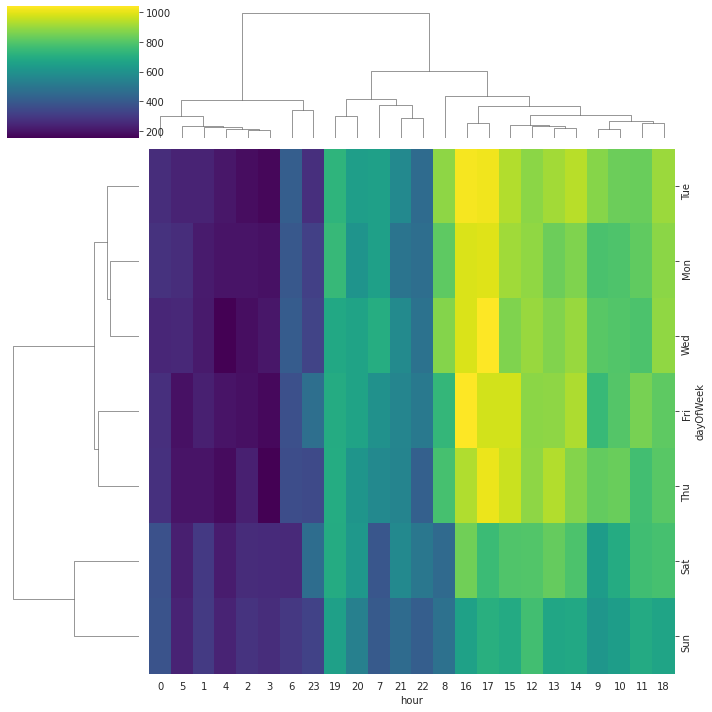

In [68]:
sns.clustermap(new_df, cmap='viridis')
plt.margins(0)
plt.tight_layout()

In [69]:
new_df.head(1)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


In [70]:
month_cols = df.groupby(['dayOfWeek', 'month']).count()['callReason'].unstack()
month_cols

month,1,2,3,4,5,6,7,8,12
dayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


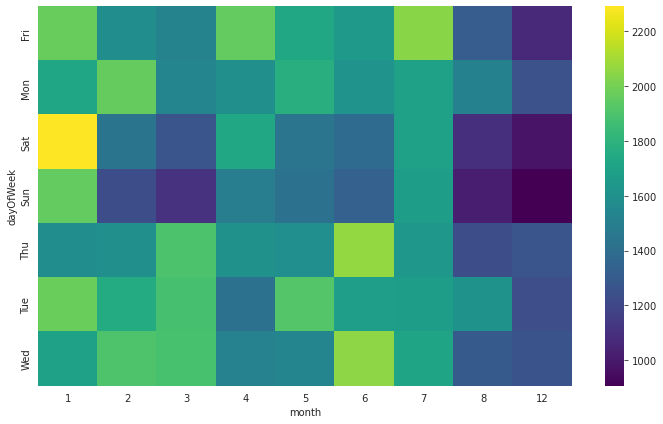

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(data=month_cols, cmap='viridis')
plt.tight_layout()

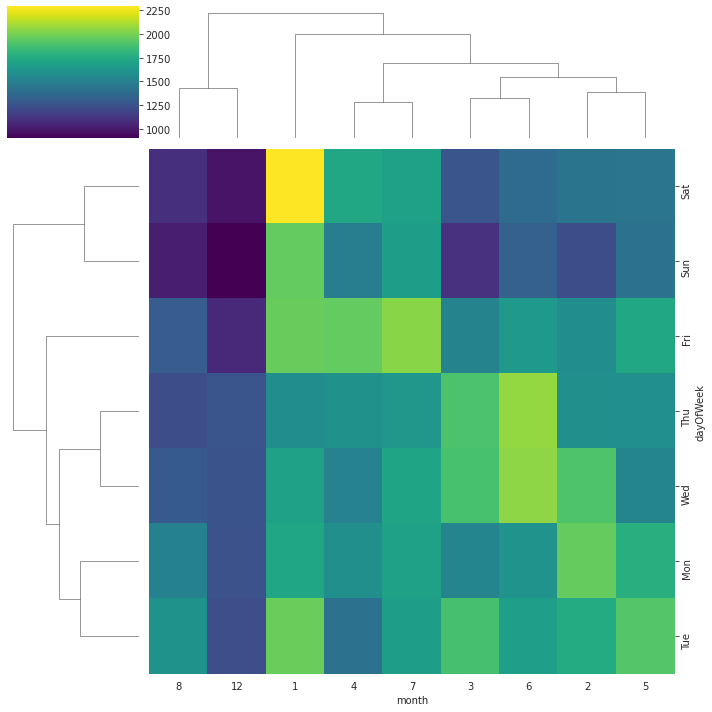

In [72]:
sns.clustermap(data=month_cols, cmap='viridis')
plt.tight_layout()